In [1]:
import pandas as pd 
import numpy as np
import librosa
from IPython.display import Audio, display 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import os

In [2]:
with_fake_audios = os.listdir('data/fake/')
with_real_audios = os.listdir('data/real/')

In [3]:
len(with_fake_audios), len(with_real_audios)

(6308, 34605)

In [4]:
# create the labels from with fake audio will be 1 and for real audio 0 

with_fake_labels = [1]*6308
with_real_labels = [0]*34605

In [5]:
labels = with_fake_labels + with_real_labels

In [6]:
# Load and play
audio, sr = librosa.load('data/fake/fake_0001.wav')
display(Audio(audio, rate=sr))

In [7]:
data = []
fake_audio_path = 'data/fake/'

for audio_file in os.listdir(fake_audio_path):
    if audio_file.endswith(".wav"):
        # Load audio
        audio, sr = librosa.load(os.path.join(fake_audio_path, audio_file), sr=22050, mono=True)

        # Extract features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).mean(axis=1)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr).mean(axis=1)
        contrast = librosa.feature.spectral_contrast(y=audio, sr=sr).mean(axis=1)

        # Combine into one feature vector
        features = np.concatenate([mfccs, chroma, contrast])

        data.append(features)

In [8]:
real_audio_path = 'data/real/'

for audio_file in os.listdir(real_audio_path):
    if audio_file.endswith(".wav"):
        # Load audio
        audio, sr = librosa.load(os.path.join(real_audio_path, audio_file), sr=22050, mono=True)

        # Extract features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).mean(axis=1)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr).mean(axis=1)
        contrast = librosa.feature.spectral_contrast(y=audio, sr=sr).mean(axis=1)

        # Combine into one feature vector
        features = np.concatenate([mfccs, chroma, contrast])

        data.append(features)

C:\Users\tamal\AppData\Roaming\Python\Python312\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [9]:
len(data), len(labels)

(40913, 40913)

In [10]:
type(data[0]), data[0].shape

(numpy.ndarray, (32,))

In [11]:
x = np.array(data) 
y = np.array(labels)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
model = keras.Sequential()

# Fix: Use single integers for 1D convolution
model.add(keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(32, 1)))  # Added channel dimension
model.add(keras.layers.MaxPooling1D(pool_size=2))  # Single integer, not tuple
model.add(keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# Fix: For binary classification, use 1 output with sigmoid OR 2 outputs with softmax
model.add(keras.layers.Dense(2, activation='sigmoid')) 

In [26]:
# compile the neural network 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10) 

Epoch 1/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8254 - loss: 0.5806 - val_accuracy: 0.9844 - val_loss: 0.0441
Epoch 2/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9635 - loss: 0.1063 - val_accuracy: 0.9801 - val_loss: 0.0549
Epoch 3/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9757 - loss: 0.0790 - val_accuracy: 0.9863 - val_loss: 0.0361
Epoch 4/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9793 - loss: 0.0625 - val_accuracy: 0.9872 - val_loss: 0.0301
Epoch 5/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9845 - loss: 0.0493 - val_accuracy: 0.9878 - val_loss: 0.0337
Epoch 6/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9839 - loss: 0.0524 - val_accuracy: 0.9826 - val_loss: 0.0509
Epoch 7/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9905 - val_loss: 0.0225
Epoch 8/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9861 - loss: 0.0425 - val_accuracy: 0.

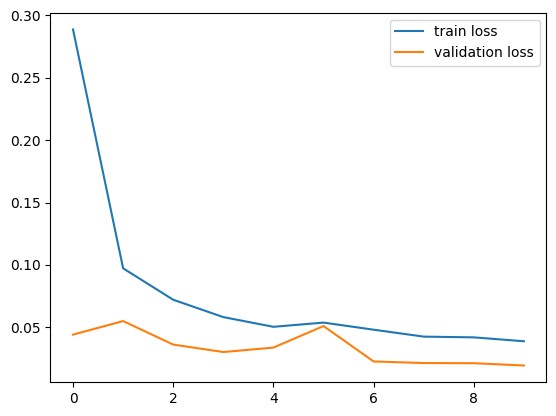

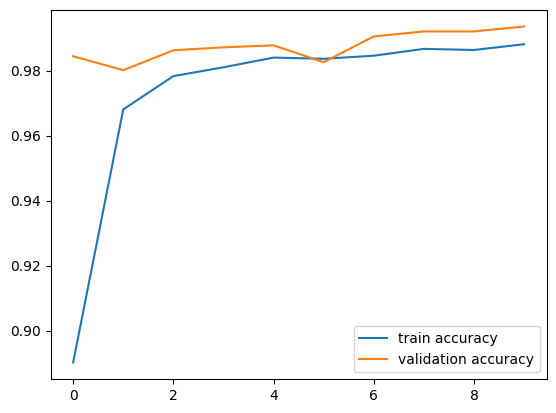

In [30]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [34]:
# Get audio file path from user
audio_path = input('Path of the audio to be predicted: ')

# Load audio
audio, sr = librosa.load(audio_path)

# Display audio player
print("Audio loaded successfully!")
display(Audio(audio, rate=sr))

# Extract features
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

# Combine features
features = np.concatenate([mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.mean(axis=1)])
print(f"Extracted features shape: {features.shape}")

# Scale the features (reshape for scaler)
features_reshaped = features.reshape(1, -1)  # Reshape to (1, n_features)

# Make prediction
input_prediction = model.predict(features_reshaped)
print(f"Raw prediction: {input_prediction}")

# Get predicted class
input_pred_label = np.argmax(input_prediction)
print(f"Predicted class: {input_pred_label}")

# Display result
if input_pred_label == 1:
    print('The audio is FAKE')
else:
    print('The audio is REAL')

Path of the audio to be predicted:  data/real/real_0011.wav


Audio loaded successfully!


Extracted features shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Raw prediction: [[1.0000000e+00 1.8135964e-08]]
Predicted class: 0
The audio is REAL
